<a href="https://colab.research.google.com/github/cakwok/CS6140-Machine-Learning/blob/main/2_3_Calculate_RME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS6140 Assignment 1
Q2.3 Root Mean Square
Wing Man, Kwok
May 22 2022


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
def compute_cost(ip, op, params):
    """
    Cost function in linear regression where the cost is calculated
    ip: input variables
    op: output variables
    params: corresponding parameters
    Returns cost
    """
    num_samples = len(ip)
    cost_sum = 0.0
    for x,y in zip(ip, op):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples)
    
    return cost

In [3]:
def linear_regression_using_batch_gradient_descent(ip, op, params, alpha, max_iter):
    """
    Compute the params for linear regression using batch gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    max_iter: maximum number of iterations
    Returns parameters, cost, params_store
    """ 
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    num_samples = len(ip)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    ip_with_bias = np.c_[ np.ones(ip.size), ip]       #convert x variables with bias column all 1
    start_time = time.time()

    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:

        #All calculation at a time, so it is batch. it won't arrive at faster computation nor accuracy, but computer resources require more because all data points are processed at a time 
        cost[iteration] = compute_cost(ip, op, params)  
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        for i in range(num_samples):
          y_hat = np.dot(params, np.array([1.0, ip[i]]))
          params += alpha/num_samples * (op[i] - y_hat) * np.array([1.0, ip[i]])

        iteration += 1
      
    print("run time", time.time() - start_time)
    
    return params, cost, params_store

In [4]:
def lin_reg_stoch_gradient_descent(ip, op, params, alpha):
    """
    Compute the params for linear regression using stochastic gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    Returns parameters, cost, params_store
    """

    # initialize iteration, number of samples, cost and parameter array
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    
    start_time = time.time()

    # Compute the cost and store the params for the corresponding cost
    for x,y in zip(input_var, output_var):
        cost[i] = compute_cost(input_var, output_var, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')
        
        # Apply stochastic gradient descent (one calculation at a time, so it is stochastic)
        y_hat = np.dot(params, np.array([1.0, x]))  #np.array instead of purley ip[i], is because the whole ip[i] features have to be considered
        params += alpha/num_samples * (y - y_hat) * np.array([1.0, x]) 
          
        i += 1
    
    print("run time:", time.time() - start_time)
    
    return params, cost, params_store

In [5]:
# Do not change the code in this cell
true_slope = 15
true_intercept = 2.4
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 300.0 * np.random.rand(len(input_var))

In [8]:
# Do not change the code in this cell
# Training the model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 100
params_hat_batch, cost_batch, params_store_batch =\
    linear_regression_using_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

--------------------------
iteration: 0
cost: 13043408.353073804
--------------------------
iteration: 1
cost: 24677.85128294303
--------------------------
iteration: 2
cost: 11138.671135226723
--------------------------
iteration: 3
cost: 11145.460259094052
--------------------------
iteration: 4
cost: 11144.782742404164
--------------------------
iteration: 5
cost: 11143.361366392774
--------------------------
iteration: 6
cost: 11141.915546603135
--------------------------
iteration: 7
cost: 11140.469606205152
--------------------------
iteration: 8
cost: 11139.02434944415
--------------------------
iteration: 9
cost: 11137.579802567347
--------------------------
iteration: 10
cost: 11136.135966105188
--------------------------
iteration: 11
cost: 11134.692839738249
--------------------------
iteration: 12
cost: 11133.25042311916
--------------------------
iteration: 13
cost: 11131.808715899797
--------------------------
iteration: 14
cost: 11130.367717732184
-----------------------

In [9]:
# Do not change the code in this cell
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 13078440.379060538
--------------------------
iteration: 1
cost: 13078457.240507754
--------------------------
iteration: 2
cost: 13078626.317507174
--------------------------
iteration: 3
cost: 13079536.532846138
--------------------------
iteration: 4
cost: 13079577.252786893
--------------------------
iteration: 5
cost: 13075526.334292794
--------------------------
iteration: 6
cost: 13069401.655911792
--------------------------
iteration: 7
cost: 13063856.848961623
--------------------------
iteration: 8
cost: 13050186.440672558
--------------------------
iteration: 9
cost: 13033912.287059875
--------------------------
iteration: 10
cost: 13012824.953597067
--------------------------
iteration: 11
cost: 12987985.35242543
--------------------------
iteration: 12
cost: 12967825.236598287
--------------------------
iteration: 13
cost: 12932962.51635226
--------------------------
iteration: 14
cost: 12888915.985800946
----------------------

In [245]:
rmse_batch = 0;  rmse_SGD = 0;
for i in range(x_test.size):
  y_hat_batch = params_hat_batch[0] + params_hat_batch[1] * x_test[i] 
  y_hat_SGD = params_hat[0] + params_hat[1] * x_test[i] 
  rmse_batch += (y_hat_batch - y_test[i] )**2
  rmse_SGD += (y_test[i] - y_hat_SGD)**2

rmse_BatchGradientDescent = np.sqrt(rmse_batch/x_test.size)
rmse_SGD = np.sqrt(rmse_SGD/x_test.size)
print("batch rms:\t", rmse_BatchGradientDescent)
print("stochastic rms:\t", rmse_SGD)


batch rms:	 116.92642690633203
stochastic rms:	 156.05006493493576


<p>cost_batch - cost function computed by batch gradient descent
<p>cost - cost function computed by SGD</p>

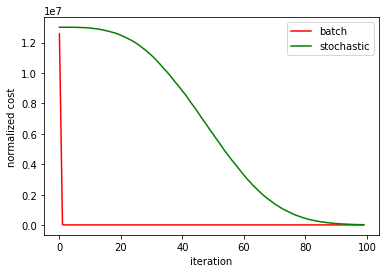

min cost with BGD: 11835.264951192166
min cost with SGD: 25803.971351024677


In [261]:
# Do not change the code in this cell
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')


<p>Q2.4.  Under this data with 100 datapoints in size, batch gradient descent shows faster reaching minimum cost by same iterations or epoch, but stochastic gradient descent shows faster computation, as show from the above printout (2 second versus 3 second).

For small dataset like this example, i think both works pretty similarity with no significant difference.  I would tend to use batch gradient descent under this scenario, in order to get a better minimum cost.

However, when dataset is large, stochastic gradient descent would be a better choice, since it doesn't overwhelm or spike computation resources in a single computation, so less memory requirement for real world application.